In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np


N = 100000

p0 = 0.1
p = 0.01
tau = 5

alpha_x = {0: 10, 1: 5, 2: 2}
beta_x =  {0: 1, 1: 1, 2: 1}
lambda_x = {0: 20, 1: 10, 2: 5}

x = np.random.choice([0, 1, 2], size=N)

k = [alpha_x[x_i] for x_i in x]
theta = [1. / beta_x[x_i] for x_i in x]
lambd = [lambda_x[x_i] for x_i in x]
z2 = np.random.gamma(k, theta)
z1 = np.random.poisson(lambd)

y1 = np.random.binomial(1, p=p0 * np.exp(-z2/tau))
y2 = np.random.binomial(z1, p)
y = y1 + y2

df = pd.DataFrame({'X': x, 'Y': y, 'Z_1': z1, 'Z_2': z2, 'Y1': y1, 'Y2': y2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb59df046d8>,
      dtype=object)

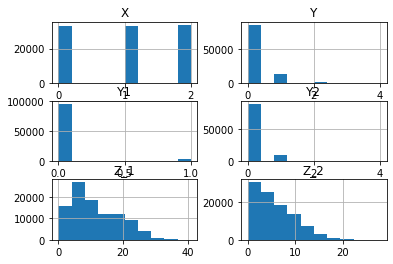

In [27]:
df.hist()

In [3]:
df.groupby('X').mean()['Y']

X
0    0.214129
1    0.140669
2    0.118162
Name: Y, dtype: float64

In [29]:
df.groupby('X').mean()[['Y1', 'Y2', 'Y']]

,Y1,Y2,Y
X,,,
0,0.015978,0.202564,0.218541
1,0.039654,0.100537,0.140191
2,0.068206,0.049994,0.118200
